# Hamoye Stage E - Amit Purswani

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [3]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.shape

(144, 2)

In [5]:
df["Month"] = pd.to_datetime(df["Month"]) #convert column to datetime

In [6]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
df.set_index("Month", inplace=True)

In [8]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Passengers')

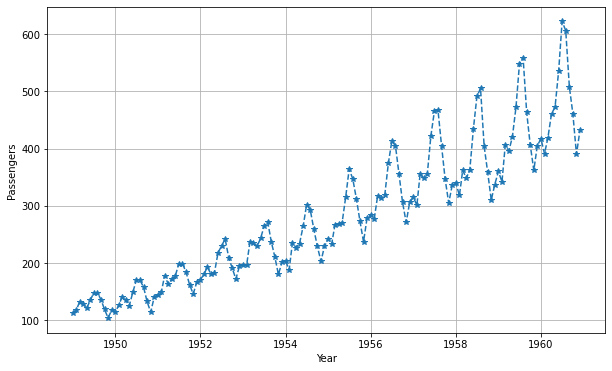

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [10]:
#check for missing values
df.isnull().values.any()

False

In [11]:
df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']
df_copy.isnull().sum()
#There are now 14 missing values in the dataset

Passengers    14
dtype: int64

In [12]:
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [13]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [14]:
#Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

In [15]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()

In [16]:
import statsmodels.api as sm
from pylab import rcParams

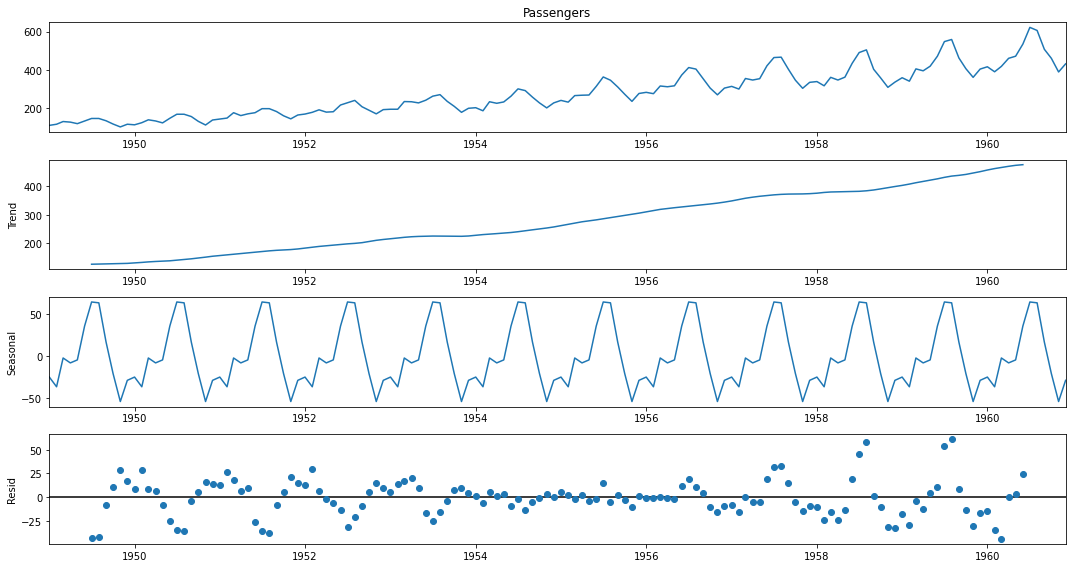

In [17]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Passengers'])

In [19]:
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used : 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


In [20]:
df_log = np.log(df)
df_diff = df_log.diff(periods=1)

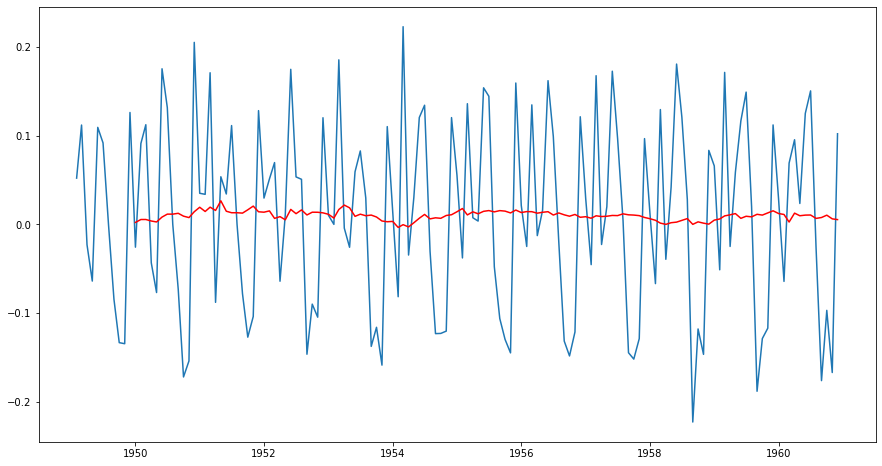

In [21]:
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

In [22]:
#Downsample to quarterly data points
df_quarterly = df.resample('3M').mean()

#Upsample to daily data points
df_daily = df.resample('D').mean()

In [23]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [24]:
df_diff.isnull().sum()

Passengers    1
dtype: int64

In [25]:
df_diff = df_diff.fillna(method='bfill')

In [26]:
df_diff.isnull().sum()

Passengers    0
dtype: int64

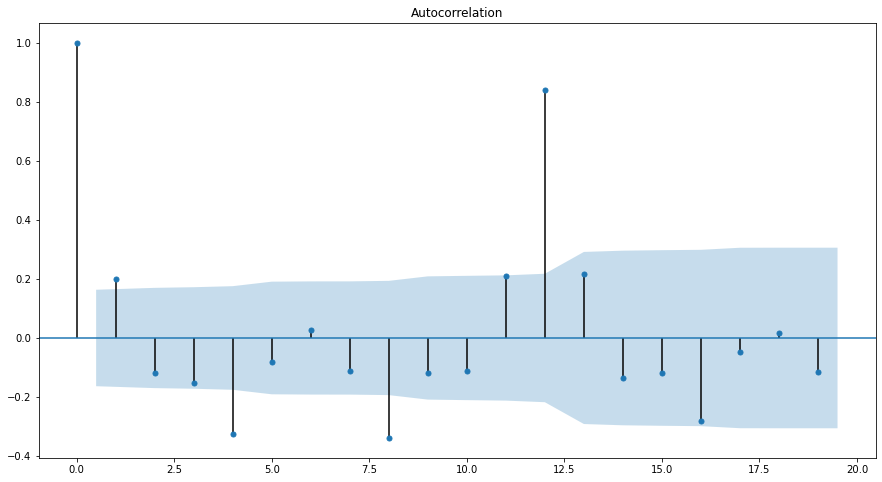

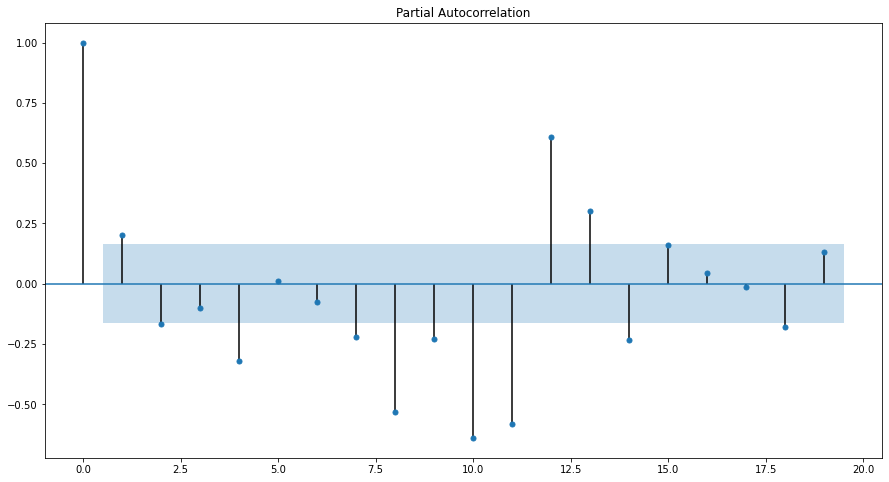

In [27]:
#ACF
plot_acf(df_diff, lags = range(0, 20))
plt.show()
#PACF
plot_pacf(df_diff, lags = range(0, 20))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


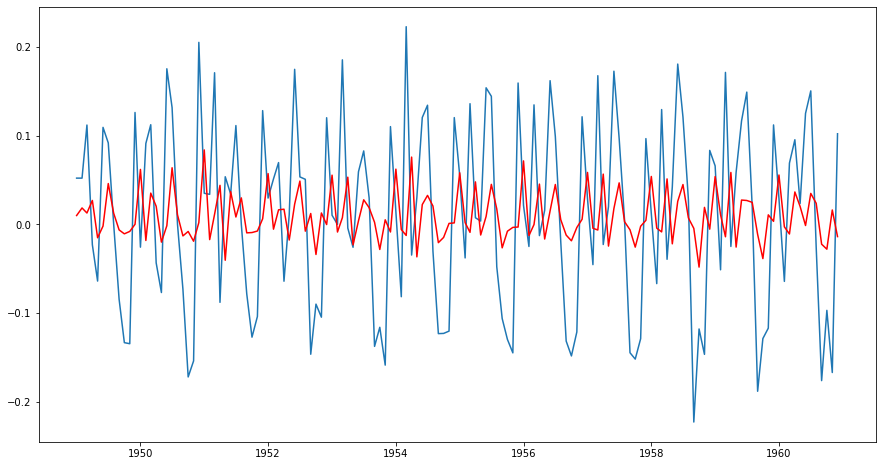

In [28]:
#AR, MA and ARIMA
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(df_diff, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


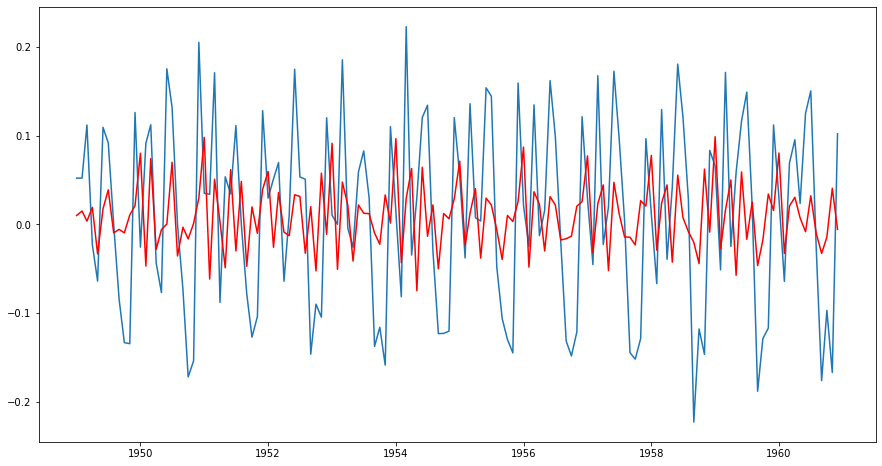

In [29]:
MA_model = ARIMA(df_diff, order=(0,0,2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color='red')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


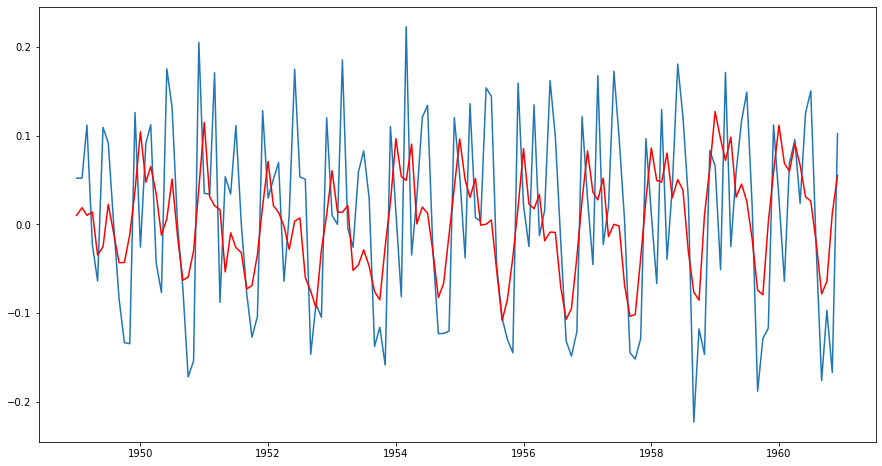

In [30]:
ARIMA_model = ARIMA(df_diff, order=(2,0,1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color='red')

In [31]:
from fbprophet import Prophet

In [32]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [33]:
df['Month']= pd.to_datetime(df['Month'])

In [34]:
df = df.rename(columns={"Month": "ds", "Passengers": "y"})

In [35]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [36]:
model = Prophet(weekly_seasonality=True,daily_seasonality=True)
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [38]:
#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,86.658775,60.146636,115.939060,110.866230,110.866230,110.866230
1,1949-02-01,75.637355,45.288962,104.350549,113.023136,113.023136,113.023136
2,1949-03-01,107.231577,79.610208,137.695204,114.971309,114.971309,114.971309
3,1949-04-01,112.670677,83.650449,140.337485,117.128216,117.128216,117.128216
4,1949-05-01,110.230539,81.028875,136.835754,119.215544,119.215544,119.215544
...,...,...,...,...,...,...,...
149,1961-05-31,535.001157,508.277025,563.600234,506.885175,506.715829,507.056189
150,1961-06-30,581.274408,551.946873,609.539165,509.911219,509.688879,510.122987
151,1961-07-31,574.288043,545.254390,602.317225,513.038132,512.762307,513.305995
152,1961-08-31,530.934454,501.285105,557.343734,516.165045,515.819472,516.494057


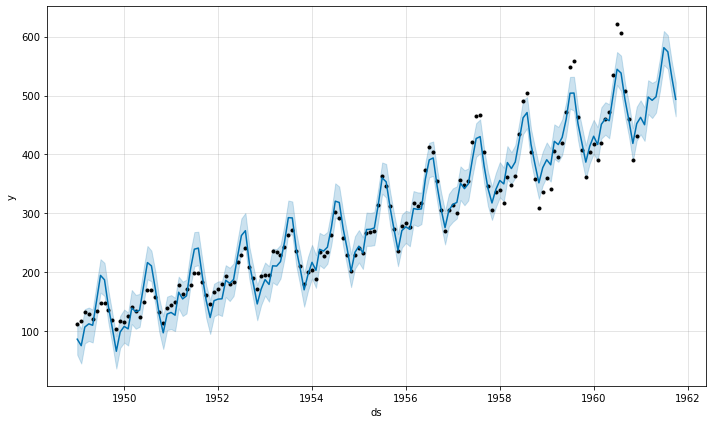

In [39]:
model.plot(forecast)
plt.show()

# Stage E Quiz

In [41]:
#loading the dataset
df = pd.read_csv('D:\People\Amit\Hamoye\stageE\household_power_consumption.txt', sep=';',
                 na_values = '?',dtype = float ,low_memory=False,infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [42]:

#check for missing values
print(df.shape)
df.isnull().sum()

(2075259, 7)


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [43]:
#filling missing values with data from the same day of the previous year
def fill_missing(values):
  one_day = 60 *24
  for row in range(values.shape[0]):
    for col in range(values.shape[1]):
      if isnan(values[row,col]):
        values[row, col] = values[row - one_day, col]

In [44]:
df2 = df.fillna(df.mean())

In [45]:
#print(df.isnull().sum())
print(df2.isnull().sum())
#df.head()
df2.head()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [46]:

#daily resampling
daily_df = df2.resample('D').sum()
print(daily_df.shape)
daily_df.head(3)

(1442, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0


In [47]:
# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

#since we have several samples of time series lets define a function that could check for
#stationarity and output the various columns that are stationary in the series.

def adf_test(d_set):
    dftest = adfuller(d_set, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','# Lags','# Observations'])

    for key, value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
      
#this function takes a time series datframe and checks the columns that are stationary.
def get_stationarity(data):
    for i in data.columns:
        print("Column: ",i)
        print('--------------------------------------')
        adf_test(data[i])

In [48]:
get_stationarity(daily_df) #calling the function to test for stationarity

Column:  Global_active_power
--------------------------------------
Test Statistic            -3.731704
p-value                    0.003689
# Lags                    22.000000
# Observations          1419.000000
Critical Value (1%)       -3.434967
Critical Value (5%)       -2.863579
Critical Value (10%)      -2.567856
dtype: float64

Series is Stationary
Column:  Global_reactive_power
--------------------------------------
Test Statistic            -3.825851
p-value                    0.002654
# Lags                    22.000000
# Observations          1419.000000
Critical Value (1%)       -3.434967
Critical Value (5%)       -2.863579
Critical Value (10%)      -2.567856
dtype: float64

Series is Stationary
Column:  Voltage
--------------------------------------
Test Statistic            -2.959237
p-value                    0.038881
# Lags                    23.000000
# Observations          1418.000000
Critical Value (1%)       -3.434970
Critical Value (5%)       -2.863580
Critical Val

In [49]:
rolling_mean = daily_df.rolling(window = 365).mean()
rolling_std = daily_df.rolling(window = 365).std()

Text(0, 0.5, 'Sub metering 1')

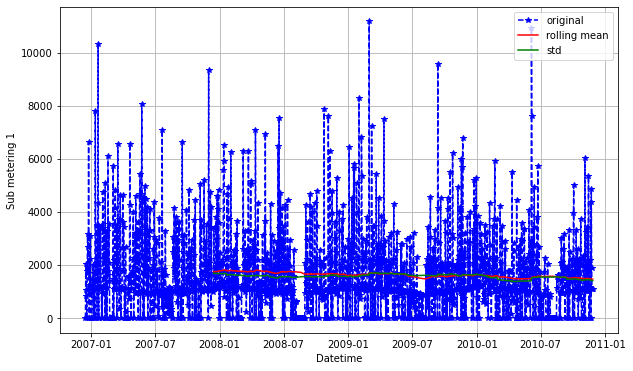

In [50]:
# SUB METERING 1 OF THE DAILY_DF
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Sub_metering_1,'--', marker='*', color = 'blue',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Sub_metering_1, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Sub_metering_1, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Sub metering 1')
# you can see that there is no obvious trend or seasonality in the plot.
# Also the mean and the Standard Deviation are constant, which supports the stationarity of the series

Text(0, 0.5, 'Global active power')

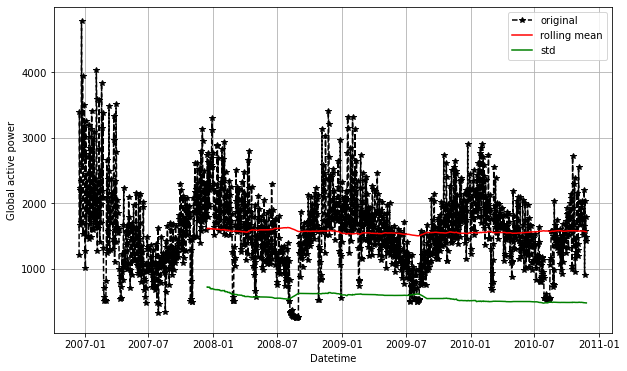

In [51]:
# GLOBAL ACTIVE POWER OF THE DAILY_DF
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Global_active_power,'--', marker='*', color = 'black',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_active_power, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_active_power, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global active power')
# There is no trend or seasonality in the Global active power from the plot.
# The mean and std are also constant.

Text(0, 0.5, 'Global Reactive Power')

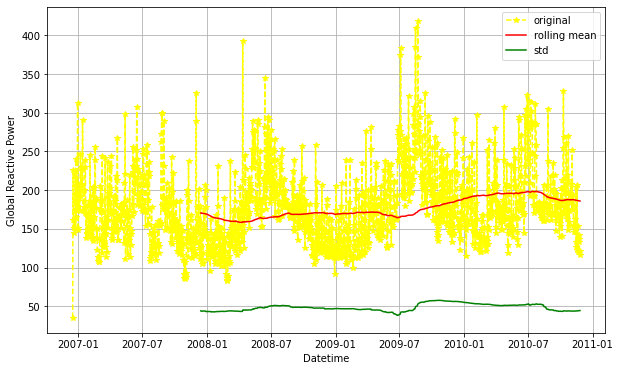

In [52]:

# GLOBAL_REACTIVE_POWER
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Global_reactive_power,'--', marker='*', color = 'yellow',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_reactive_power, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_reactive_power, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global Reactive Power')

Text(0, 0.5, 'Sub metering 2')

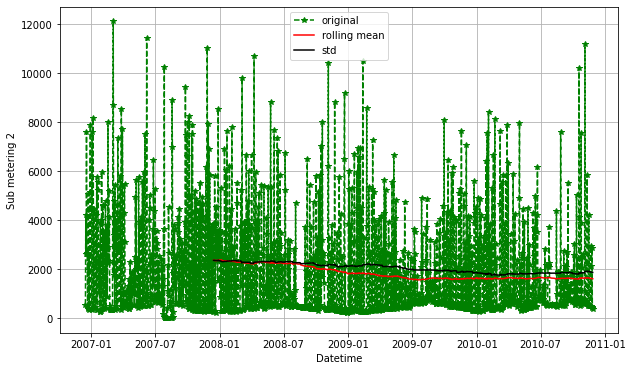

In [53]:
#SUB METERING 2
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Sub_metering_2,'--', marker='*', color = 'green',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Sub_metering_2, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Sub_metering_2, color = 'black', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Sub metering 2')

Text(0, 0.5, 'Global_intensity')

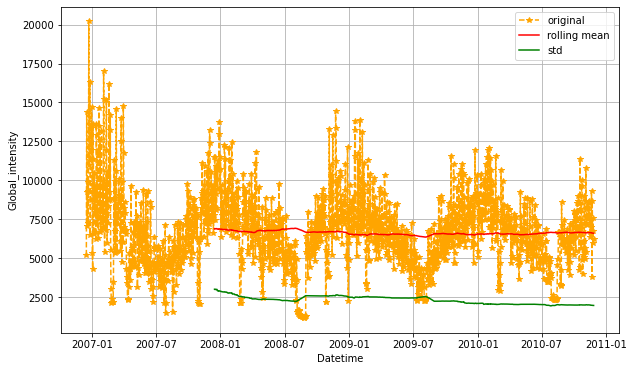

In [54]:
# GLOBAL INTENSITY
plt.figure(figsize=(10,6))
original = plt.plot(daily_df.index, daily_df.Global_intensity,'--', marker='*', color = 'orange',label = 'original')
mean = plt.plot(rolling_mean.index, rolling_mean.Global_intensity, color = 'red',label = 'rolling mean')
std = plt.plot(rolling_std.index, rolling_std.Global_intensity, color = 'green', label = 'std')
plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Datetime')
plt.ylabel('Global_intensity')

Text(0, 0.5, 'global active power')

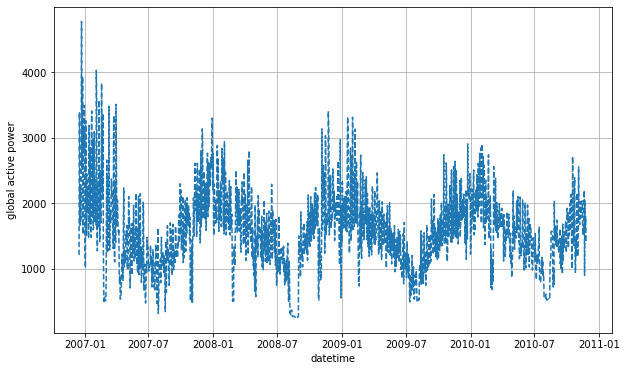

In [55]:
#plot of global active power on th daily time frame
plt.figure(figsize=(10,6))
plt.plot(daily_df.index, daily_df.Global_active_power,'--')
plt.grid()
plt.xlabel('datetime')
plt.ylabel('global active power')

In [56]:
from scipy.stats import pearsonr
pearsonr(df2['Global_active_power'],df2['Global_reactive_power'])

(0.24701705264406354, 0.0)

In [57]:
pearsonr(df2['Voltage'],df2['Global_intensity'])

(-0.41136307176847053, 0.0)

In [58]:
from fbprophet import Prophet

In [59]:
#we have to reset the datetime index and assign it as a column in the new dataframe
daily_df.reset_index(inplace=True)
#next we take a slice of the Dataframe columns that would be used to build the prophet model and assign it to a variable
prophet_daily = daily_df[['datetime','Global_active_power']]

In [60]:
#renaming the columns 
prophet_daily = prophet_daily.rename(columns = {'datetime': 'ds','Global_active_power': 'y'})
print(prophet_daily.shape)
prophet_daily.head()

(1442, 2)


,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [61]:
train_set = prophet_daily.iloc[:1077,:]
test_set = prophet_daily.iloc[1077:,:]
print(train_set.shape)
print(test_set.shape)

(1077, 2)
(365, 2)


In [62]:
#fitting the model to the dataset
p_model = Prophet()
p_model.fit(train_set)
pred = p_model.predict(test_set)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
# Define a model for the calculation of MAPE
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [64]:
mape = Metric(test_set['y'],pred['yhat'])
print(f'the Mean Average Percentage Error ( MAPE) is:{round(mape,1)}')

the Mean Average Percentage Error ( MAPE) is:20.9


In [65]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set['y']),np.array(pred['yhat'])))
print('The Root Mean Square Error(rmse) value is : %s' %(round(rmse,1)))

The Root Mean Square Error(rmse) value is : 375.0


Figure(648x648)


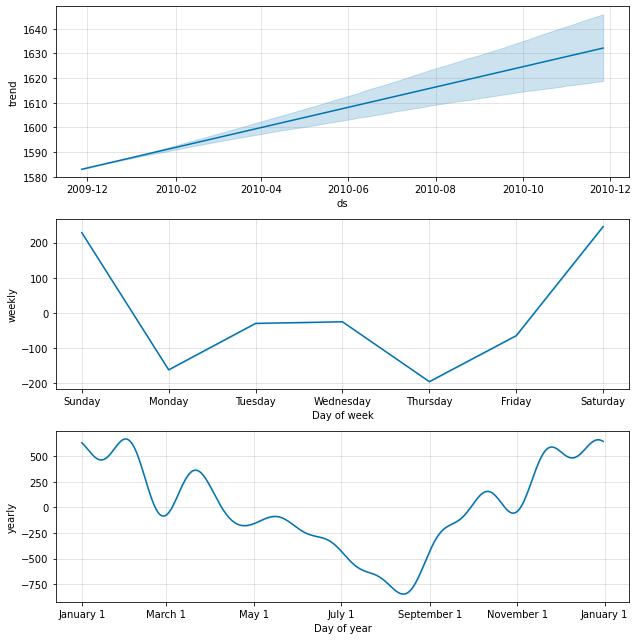

In [66]:

print(p_model.plot_components(pred))
# from the plot of yearly seasonality AUGUST has the lowest value.

In [67]:
# reseting the index column of the daily_df
daily_df.reset_index(inplace = True)
multi_prophet = daily_df
print(multi_prophet.shape)
multi_prophet.head()

(1442, 9)


,index,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [68]:
# Renaming the columns to prophet name format
multi_prophet = multi_prophet.rename(columns = {'datetime':'ds','Global_active_power':'y','Global_reactive_power':'add1',
                                                'Voltage':'add2','Global_intensity':'add3','Sub_metering_1':'add4',
                                                'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [69]:
train_set_multi = multi_prophet.iloc[:1077,:]
test_set_multi = multi_prophet.iloc[1077:,:]
print(train_set_multi.shape)
print(test_set_multi.shape)

(1077, 9)
(365, 9)


In [70]:
# Creating the prophet multivariate model
m_model = Prophet()
m_model.add_regressor('add1')
m_model.add_regressor('add2')
m_model.add_regressor('add3')
m_model.add_regressor('add4')
m_model.add_regressor('add5')
m_model.add_regressor('add6')

In [71]:

# Fitting the model to train set
m_model.fit(train_set_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:

# Making prediction with test_set
m_pred = m_model.predict(test_set_multi)

In [73]:

# calculating the MAPE using the previously defined function
mape = Metric(test_set_multi['y'],m_pred['yhat'])
print('The Mean Average Percentage Error ( MAPE) Is:%s' %round(mape,2))

The Mean Average Percentage Error ( MAPE) Is:2.54


In [74]:

from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test_set_multi['y']),np.array(m_pred['yhat'])))
print('The Root Mean Square Error(rmse) Value Is : {}'.format(round(rmse,2)))

The Root Mean Square Error(rmse) Value Is : 38.03


Figure(648x864)


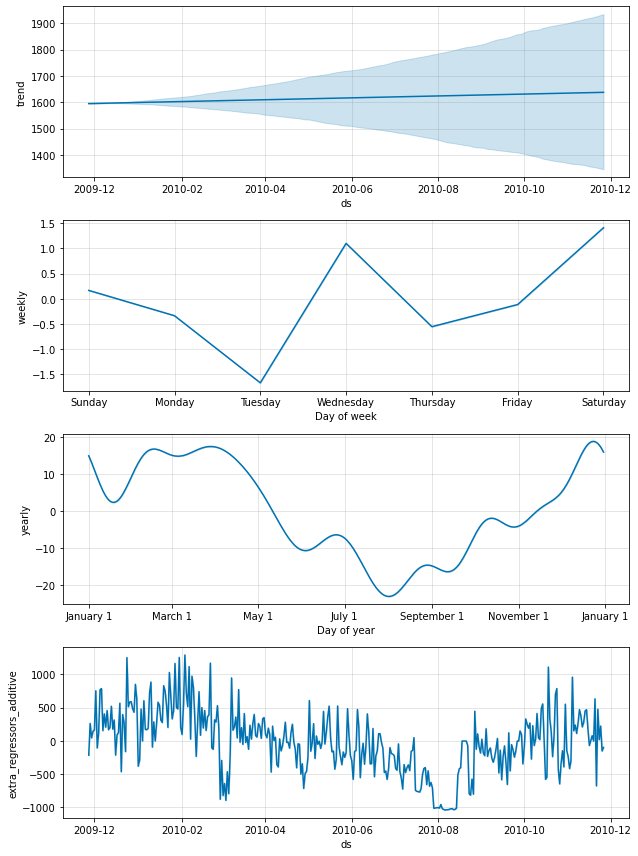

In [75]:
print(m_model.plot_components(m_pred))
#from the plot of the weekly multivariate forecasted model , TUESDAY has the lowest value